# Linear Regression

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('regression_practice_data.csv')

### Lets draw a scatter plot of the data

In [3]:
x = data.iloc[:,0]
y = data.iloc[:,1]

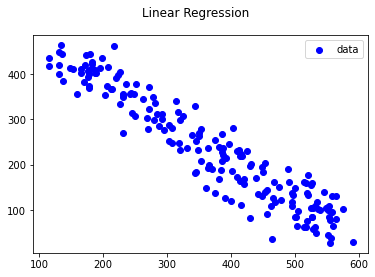

In [4]:
fig, ax=plt.subplots()
ax.scatter(x,y,color='blue',label='data')
fig.suptitle('Linear Regression')
ax.legend()
plt.show()

### Clearly this is a regression dataset, lets fit a regression line to this data

### first, we must import the linear regression library from sklearn

In [5]:
from sklearn import linear_model

In [8]:
model = linear_model.LinearRegression()

### Need arrays for this library

In [9]:
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [10]:
model.fit(x,y)

LinearRegression()

In [11]:
a = model.intercept_
b = model.coef_

In [12]:
a=a.item()
b=b.item()

In [13]:
print('The intercept is')
print(a)

The intercept is
550.0402945000703


In [14]:
print('The slope is')
print(b)

The slope is
-0.8583136987558941


### We have an equation of the form $y = -.85x + 550$ , Lets now plot this regression line

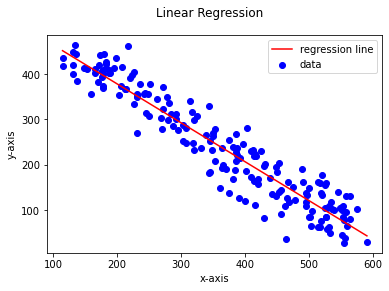

In [15]:
fig, ax=plt.subplots()
ax.scatter(x,y,color='blue',label='data')
ax.plot(x, a+b*x, color='red',label='regression line')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
fig.suptitle('Linear Regression')
ax.legend()
plt.show()

### Lets see how linearly dependent this the data is using the function reg

In [16]:
model.score(x,y)

0.9028345175064316

#### reg gives us values between 0 and 1, where 0 is a no linear relationship and 1 is linear relationship 
#### with a score of .90, we can conclude there is a strong linear relationship between the x and y values

## Multivariate Linear Regression

### Lets take a look at a data file that has multiple attribues and construct a multivariable linear regression model

In [17]:
cig = pd.read_csv('cigarettes.csv')

### Importing Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Looking at the data

In [19]:
cig.head()

,Brand,Tar (mg),Nicotine (mg),Weight (g),CO content (mg)
0,Alpine,14.1,0.86,0.9853,13.6
1,Benson&Hedges,16.0,1.06,1.0938,16.6
2,BullDurham,29.8,2.03,1.1650,23.5
3,CamelLights,8.0,0.67,0.9280,10.2
4,Carlton,4.1,0.40,0.9462,5.4


### I will construct a model using Tar and Nicotine and Weight to predict the CO content

### First I will split the data using a 75-25 split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = cig.iloc[:,1:4] # Exclude the first column 
y = cig.iloc[:,4]

In [22]:
X.head()

,Tar (mg),Nicotine (mg),Weight (g)
0,14.1,0.86,0.9853
1,16.0,1.06,1.0938
2,29.8,2.03,1.1650
3,8.0,0.67,0.9280
4,4.1,0.40,0.9462


In [23]:
y.head()

0    13.6
1    16.6
2    23.5
3    10.2
4     5.4
Name: CO content (mg), dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

### I will create another model object 

In [25]:
model = linear_model.LinearRegression()

In [26]:
model = model.fit(X_train, y_train)

In [27]:
a = model.intercept_
b = model.coef_

In [28]:
print('The slope is')
print(b)

The slope is
[ 0.85881562 -1.43404955  3.07253469]


In [29]:
print('The intercept is')
print(a)

The intercept is
0.32989508428196324


### We have an equation of the form $y = .32 + .85T + -1.43N + 3.07W$

### Lets see how much of a linear relationship there is between the attributes

In [30]:
model.score(X_train,y_train)

0.9271833743576232

### As explained before, this score is close to one, So we can see that there is a strong linear relationship

### Lets make some predicitons on the test data

In [31]:
pred = model.predict(X_test)

In [32]:
pred

array([ 9.61491679, 12.4553635 , 12.96786132,  9.09091904,  8.7374064 ,
       13.61012423, 15.46383177])

In [33]:
pred = np.vstack(pred)

In [34]:
pred

array([[ 9.61491679],
       [12.4553635 ],
       [12.96786132],
       [ 9.09091904],
       [ 8.7374064 ],
       [13.61012423],
       [15.46383177]])

### The actual values are

In [35]:
y_test

14     9.5
13    10.2
17    12.6
3     10.2
21     8.5
10    13.0
18    17.5
Name: CO content (mg), dtype: float64